# Análisis de datos exploratorio

## Cargar datos

In [1]:
import pandas as pd
import numpy as np

In [2]:
try:
    df = pd.read_parquet("0.parquet")
except:
    print("Downloading dataset .....")
    !curl -L "https://huggingface.co/datasets/GonzaloA/fake_news/resolve/refs%2Fconvert%2Fparquet/default/train/0000.parquet" -o 0.parquet 

## Inspeccionar datos

In [3]:
df.head(5)

,Unnamed: 0,title,text,label
0,0,‘Maury’ Show Official Facebook Posts F*CKED U...,Maury is perhaps one of the trashiest shows on...,0
1,1,Trump’s Favorite News Channel Tries To Soothe...,"Yesterday, after the father of one of the UCLA...",0
2,2,"Russia warns Iraq, Kurds not to destabilize Mi...",MOSCOW (Reuters) - Russia on Wednesday warned ...,1
3,3,WATCH STEVE SCALISE Throw A Strike At The Nati...,"House Majority Whip Steve Scalise (R., La.) th...",0
4,4,Trump Will HATE What Stephen Colbert Just Did...,It can be said that Late Show host Stephen Col...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  24353 non-null  int64 
 1   title       24353 non-null  object
 2   text        24353 non-null  object
 3   label       24353 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 761.2+ KB


# Visualizacion del Dataset

## Dataset Balanceado

d:\Codes\IA-Project\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\IA-Project\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\IA-Project\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\IA-Project\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(-12.430555555555555, 0.5, 'Conteo')

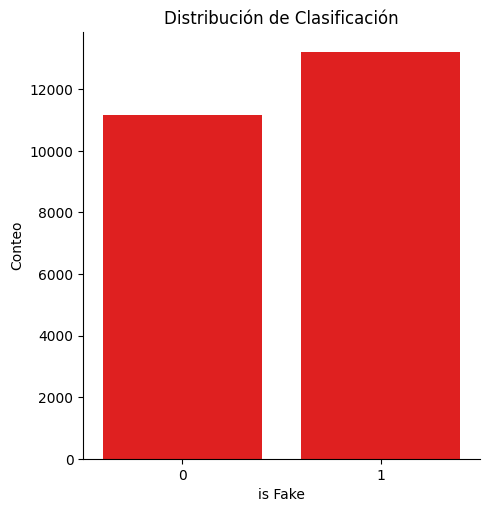

In [5]:
## Librerias para graficación
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizamos si la data esta balanceada
sns.catplot(x="label", kind="count", color="r", data=df)
plt.title("Distribución de Clasificación")
plt.xlabel("is Fake")
plt.ylabel("Conteo")

## Word Cloud de los titulares de las *Fake News*

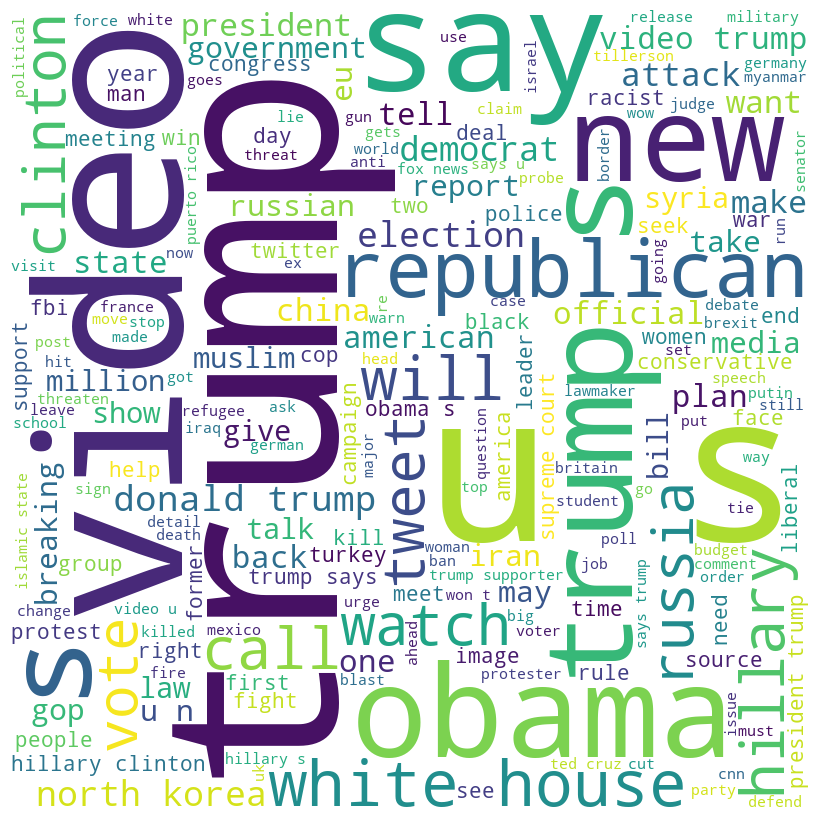

In [6]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS

comment_words = ""
stopwords = set(STOPWORDS)

# Recorrer el dataframe
for val in df["title"]:
    # Castear cada palabra a string
    val = str(val)

    # Separamos por palabra
    tokens = val.split()

    # Pasamos a minusculas
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(
    width=800,
    height=800,
    background_color="white",
    stopwords=stopwords,
    min_font_size=10,
).generate(comment_words)

# Generamos el plot
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Pre-Procesado de los datos para NLP

## Preparación De Los Datos

In [7]:
import re        # Libreria para expresiones regulares
import gensim    # Libreria para el pre-procesamiento de lenguaje natural
import gensim.downloader # Libreria para descargar modelos pre-entrenados
import nltk # Libreria para el pre-procesamiento de lenguaje natural
from nltk.corpus import stopwords
lemmer = nltk.stem.WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pms_l\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pms_l\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Eliminamos columnas innecesarias para el entramiento del modelo
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df['features'] = df['title']+df['text']
df.head(5)

,title,text,label,features
0,‘Maury’ Show Official Facebook Posts F*CKED U...,Maury is perhaps one of the trashiest shows on...,0,‘Maury’ Show Official Facebook Posts F*CKED U...
1,Trump’s Favorite News Channel Tries To Soothe...,"Yesterday, after the father of one of the UCLA...",0,Trump’s Favorite News Channel Tries To Soothe...
2,"Russia warns Iraq, Kurds not to destabilize Mi...",MOSCOW (Reuters) - Russia on Wednesday warned ...,1,"Russia warns Iraq, Kurds not to destabilize Mi..."
3,WATCH STEVE SCALISE Throw A Strike At The Nati...,"House Majority Whip Steve Scalise (R., La.) th...",0,WATCH STEVE SCALISE Throw A Strike At The Nati...
4,Trump Will HATE What Stephen Colbert Just Did...,It can be said that Late Show host Stephen Col...,0,Trump Will HATE What Stephen Colbert Just Did...


## Creacion de la representacion del texto (Word2Vec, Keras Embedding, BOW)

In [9]:
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
from sklearn.feature_extraction.text import CountVectorizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [10]:
def padding_2d(train: list):
    X_train_vect_avg = []
    for v in train:
        if v.size:
            X_train_vect_avg.append(v.mean(axis=0))
        else:
            X_train_vect_avg.append(np.zeros(100, dtype=float))
    return X_train_vect_avg

def padding(x_train: list, y_train: list, method: str="3d", max_length:int =100) -> tuple:
    if method == "3d":
        x = pad_sequences(x_train, maxlen=max_length, padding="post")
        y = pad_sequences(y_train, maxlen=max_length, padding="post")
    else:
        x = padding_2d(x_train)
        y = padding_2d(y_train)
    return (x, y)

In [11]:
def create_representation(representation: str, df: object):
    if representation != "keras":
        try:
            # Read the 'word2vec-google-news-300'
            word2vec = KeyedVectors.load("word2vec.model")
        except Exception as e:
            # Download the 'word2vec-google-news-300'
            print(f"Error {e}")
            print("Generating model word2vec")
            word2vec = gensim.downloader.load("word2vec-google-news-300")
            word2vec.save("word2vec.model")
        words = set(word2vec.index_to_key)
        features = list(
            map(lambda x: gensim.utils.simple_preprocess(x), df["features"])
        )
        X_train, X_test, y_train, y_test = train_test_split(
            features, df["label"], test_size=0.2
        )
        X_train = [np.array([word2vec[i] for i in ls if i in words]) for ls in X_train]
        X_test = [np.array([word2vec[i] for i in ls if i in words]) for ls in X_test]
        X_train, X_test = padding(X_train, X_test, "2d")
    else:
        max_words = 10000
        max_sequence_length = 100

        tokenizer = Tokenizer(num_words=max_words)
        tokenizer.fit_on_texts(df["features"])

        X_sequences = tokenizer.texts_to_sequences(
            df["features"]
        )  # Convertir texto a secuencia de números

        X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length)

        X_train, X_test, y_train, y_test = train_test_split(
            X_padded, df["label"], test_size=0.2, random_state=42
        )

    return (X_train, X_test, y_train, y_test)

In [12]:
X_train, X_test, y_train, y_test = create_representation("keras", df)

In [13]:
def generate_primes(limit):
    # Create a boolean array "prime[0..n]" and initialize
    # all entries it as true. A value in prime[i] will
    # finally be false if i is Not a prime, else true.
    prime = [True for i in range(limit+1)]
    p = 2
    while p**2 <= limit:
        # If prime[p] is not changed, then it is a prime
        if prime[p] == True:
            # Update all multiples of p
            for i in range(p**2, limit+1, p):
                prime[i] = False
        p += 1
    # Return all prime numbers
    return [p for p in range(2, limit+1) if prime[p]]

# Modelating

## Redes Neuronales 

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten 
from tensorflow.keras.layers import Embedding, LSTM

In [15]:
# Construir y entrenar la red neuronal
model = Sequential()
embedding_dim = 100
max_words = 10000
max_sequence_length = 100
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Dense(200, activation='relu'))  # 100 es la dimensión de los vectores de Word2Vec
model.add(Dense(100, activation='relu'))  # 100 es la dimensión de los vectores de Word2Vec
model.add(Dense(25, activation='relu'))  # 100 es la dimensión de los vectores de Word2Vec
model.add(LSTM(128)) 
model.add(Dense(1, activation='sigmoid'))  # Capa de salida para la clasificación binaria

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 dense (Dense)               (None, 100, 200)          20200     
                                                                 
 dense_1 (Dense)             (None, 100, 100)          20100     
                                                                 
 dense_2 (Dense)             (None, 100, 25)           2525      
                                                                 
 lstm (LSTM)                 (None, 128)               78848     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1121802 (4.28 MB)
Trainable params: 112180

In [16]:
history = model.fit(
    np.array(X_train),
    y_train,
    epochs=50,
    batch_size=64,
    verbose=True,
    validation_data=(np.array(X_test), y_test),
    workers=2,
)

Epoch 1/50
305/305 [==============================] - 45s 139ms/step - loss: 0.2141 - accuracy: 0.9027 - val_loss: 0.1460 - val_accuracy: 0.9516
Epoch 2/50
305/305 [==============================] - 43s 142ms/step - loss: 0.0722 - accuracy: 0.9759 - val_loss: 0.1137 - val_accuracy: 0.9600
Epoch 3/50
305/305 [==============================] - 42s 137ms/step - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.1221 - val_accuracy: 0.9596
Epoch 4/50
305/305 [==============================] - 43s 140ms/step - loss: 0.0264 - accuracy: 0.9916 - val_loss: 0.1462 - val_accuracy: 0.9606
Epoch 5/50
305/305 [==============================] - 44s 145ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.1559 - val_accuracy: 0.9591
Epoch 6/50
305/305 [==============================] - 43s 142ms/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.1809 - val_accuracy: 0.9579
Epoch 7/50
305/305 [==============================] - 43s 141ms/step - loss: 0.0096 - accuracy: 0.9975 - val_loss: 0.2126 - val_ac

## Evaluation

In [17]:
# Evaluar el modelo
loss, accuracy = model.evaluate(np.array(X_test), y_test)
print(f'Accuracy: {accuracy}')

153/153 [==============================] - 3s 17ms/step - loss: 0.4825 - accuracy: 0.9587
Accuracy: 0.9587353467941284


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

153/153 [==============================] - 3s 18ms/step


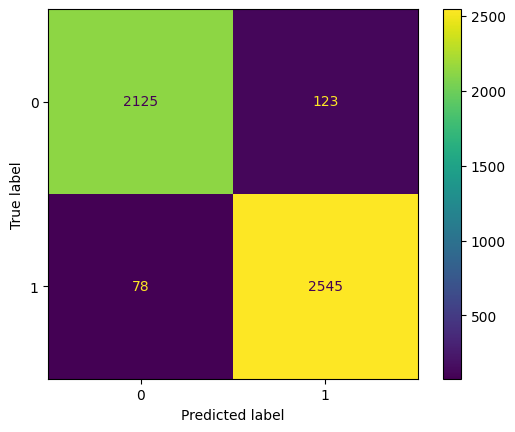

In [19]:
predictions = model.predict(np.array(X_test))
predictions = list(map(lambda x: 1 if (x > 0.5) else 0, predictions))

cm = confusion_matrix(y_test, predictions,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

In [20]:
print(classification_report(y_test, list(predictions), digits=4))

              precision    recall  f1-score   support

           0     0.9646    0.9453    0.9548      2248
           1     0.9539    0.9703    0.9620      2623

    accuracy                         0.9587      4871
   macro avg     0.9592    0.9578    0.9584      4871
weighted avg     0.9588    0.9587    0.9587      4871



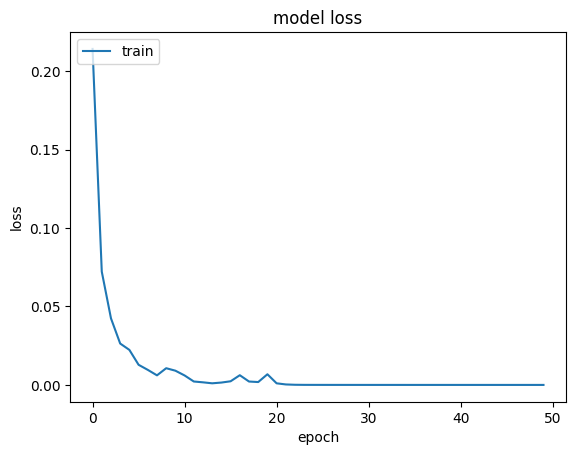

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()